<a href="https://colab.research.google.com/github/aozdl/Alternative-time-series-project/blob/main/Alternative_time_series_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import joblib

# Import Dataset

In [4]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df = pd.read_csv(url)

df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

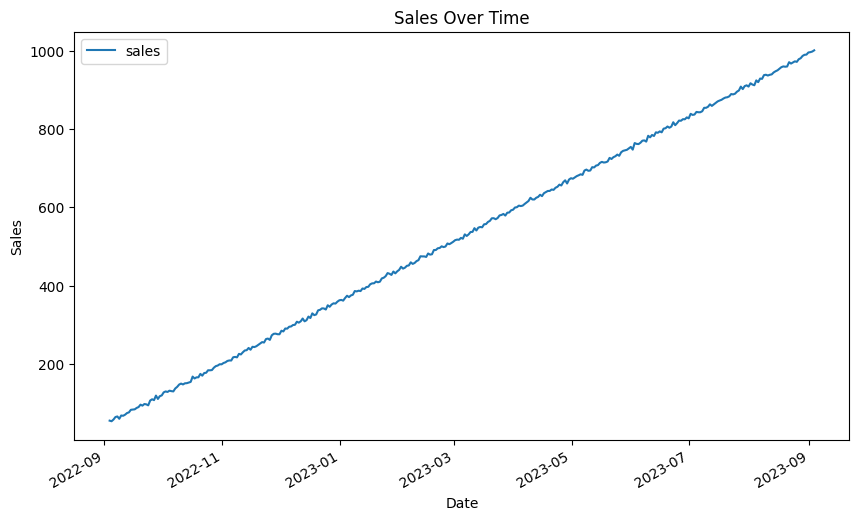

In [6]:
df.plot(y='sales', title='Sales Over Time', figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [7]:
print(pd.infer_freq(df.index))

D


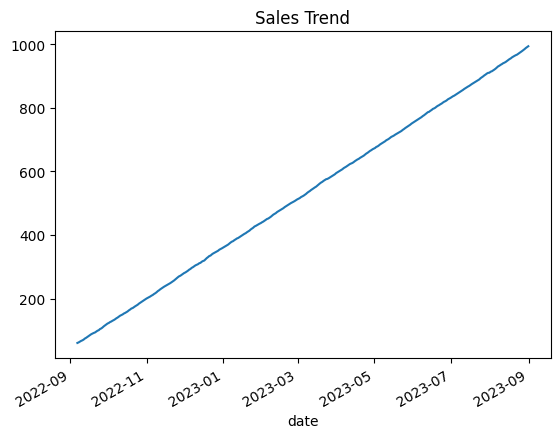

In [8]:
decomposition = seasonal_decompose(df['sales'], model='additive')
decomposition.trend.plot(title='Sales Trend')
plt.show()

In [9]:
adf_result = adfuller(df['sales'].dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063


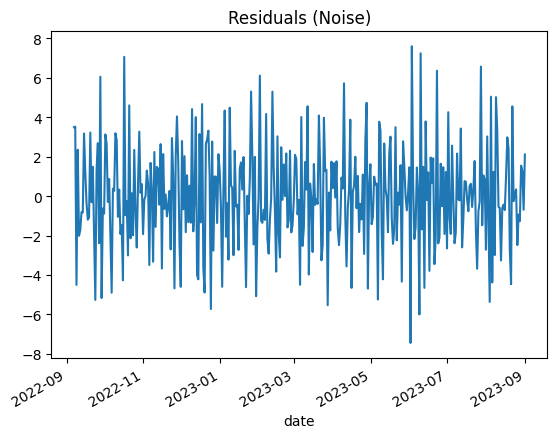

In [10]:
decomposition.resid.plot(title='Residuals (Noise)')
plt.show()

In [11]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [12]:
model = auto_arima(train['sales'], seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1787.279, Time=5.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2036.304, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1913.652, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1784.613, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2142.784, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1783.937, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1785.936, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1788.601, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1783.951, Time=0.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1866.453, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.94 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 9.429 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  354
M

In [13]:
model.fit(train['sales'])

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

<ipython-input-14-276d051be8b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_sales'] = forecast


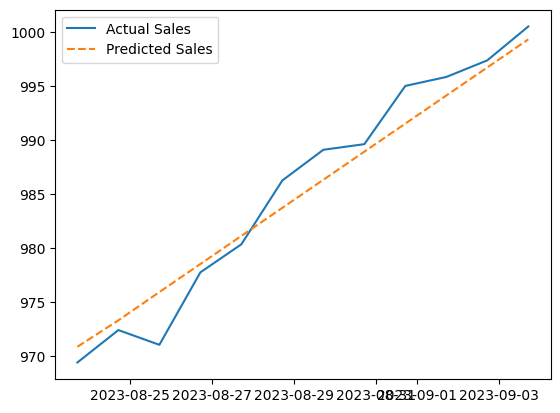

In [14]:
forecast = model.predict(n_periods=len(test))
test['predicted_sales'] = forecast

# Plot predictions vs actual sales
plt.plot(test.index, test['sales'], label='Actual Sales')
plt.plot(test.index, test['predicted_sales'], label='Predicted Sales', linestyle='--')
plt.legend()
plt.show()

In [15]:
mae = mean_absolute_error(test['sales'], test['predicted_sales'])
rmse = np.sqrt(mean_squared_error(test['sales'], test['predicted_sales']))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 1.8186643467620154
RMSE: 2.2252506501251395


In [16]:
joblib.dump(model, 'arima_sales_forecast.pkl')

['arima_sales_forecast.pkl']